In [4]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [5]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan = DBSCAN(eps=0.5, metric='euclidean', min_samples=2)

#eps : float, optional

#The maximum distance between two samples for them to be considered as in the same neighborhood.

#min_samples : int, optional

#The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

#metric : string, or callable

#The metric to use when calculating distance between instances in a feature array.


In [8]:
# fit dbscan on data
result = dbscan.fit(iris.data)

In [9]:
# show clusters created by fitting dbscan
print(result.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  2  1  1  2  1  1  1  1  1  1  1  3  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  3  1  1  1  1  1  2  1  1
  1  1  2  1  1  1  1  1  1  4 -1  1 -1 -1  1  1  1  1  1  1  1  5  4  1
  1  1  4  1  1  1  1  1  1  1  1  5  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [10]:
# DBSCAN Predict, you can pass any test data and it will predict the cluster and noise
dbscan.fit_predict(iris.data)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  4, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  5,  4,
        1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [15]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(result.labels_)) - (1 if -1 in result.labels_ else 0)

print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 6


In [16]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=3).fit(iris.data)

In [18]:
pca_2d = pca.transform(iris.data)
pca_2d

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ],
       [-2.50652679,  0.65193501, -0.069275  ],
       [-2.61314272,  0.02152063,  0.10765035],
       [-2.78743398, -0.22774019, -0.20032779],
       [-3.22520045, -0.50327991,  0.06841363],
       [-2.64354322,  1.1861949 , -0.1445057 ],
       [-2.38386932,  1.34475434,  0.28373066],
       [-2.6225262 ,  0.81808967,  0.14531599],
       [-2.64832273,  0.31913667,  0.03339425],
       [-2.19907796,  0.87924409, -0.11452146],
       [-2.58734619,  0.52047364,  0.21957209],
       [-2.3105317 ,  0.39786782, -0.233

In [19]:
import numpy as np
import matplotlib.pyplot as plt


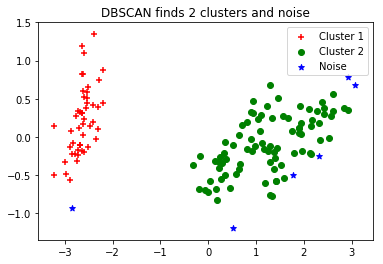

In [22]:
# just for visualization can use other plotting methods like qlik or tableau nad considering few clusters
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    if dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
    if dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
        
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2','Noise'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()

In [23]:
# DBSCAN Predict
dbscan.fit_predict(iris.data)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,
        3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  3,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,  2,  1,  1,  1,
        1,  1,  1,  4, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  5,  4,
        1,  1,  1,  4,  1,  1,  1,  1,  1,  1,  1,  1,  5,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)